In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List
import random

xa[:3] = [11.735761615631901, 11.314865966419008, 11.358432537016402]


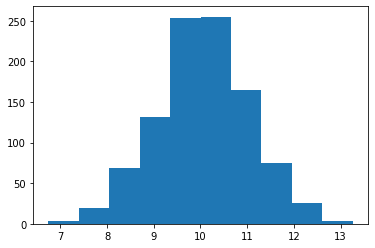

xb[:3] = [10.11783560660273, 12.180952582695847, 9.536368062864385]


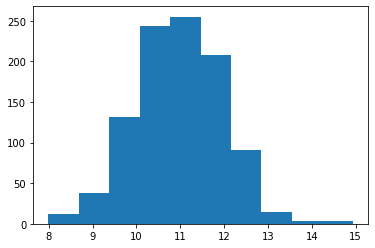

x = array([10.0001956 , 10.1578901 ,  9.99274661, ...,  9.8954312 ,
       11.0583857 , 11.57585696])
y = array([1., 1., 1., ..., 0., 0., 1.])


In [2]:
def gen_data(n: int = 1000, shuffle: bool = True, plot: bool = False, debug: bool = False) -> Tuple[List[float], List[float]]:
    """Generate n xa, xb numbers from Gaussian distributions
    n xa numbers generated from Gaus(10, 1)
    n xb numbers generated from Gaus(11, 1))"""
    xa = [np.random.normal(10, 1) for i in range(n)]
    ya = np.zeros_like(xa)
    if debug:
        print(f'{xa[:3] = }')
    if plot:
        c, _, _ = plt.hist(xa)
        plt.show()

    xb = [np.random.normal(11, 1) for i in range(n)]
    yb = np.ones_like(xb)
    if debug:
        print(f'{xb[:3] = }')
    if plot:
        c, _, _ = plt.hist(xb)
        plt.show()
        
    x = np.concatenate([xa,xb]) # targets
    y = np.concatenate([ya,yb]) # labels
    
    # Shuffle coherently
    if shuffle:
        seed = random.randrange(10000)
        random.seed(seed)
        random.shuffle(x)
        random.seed(seed)
        random.shuffle(y)
    
    if debug:
        print(f'{x = }')
        print(f'{y = }')
    return x, y

# Testing
_, _ = gen_data(1000, True, True, True)

In [3]:
# Make model

import torch.nn as nn

model = nn.Sequential(
    nn.Linear(1, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 1),
    nn.Sigmoid()
)

# Print model
print(model)

loss = nn.BCELoss()

from torch.optim import Adam

opt = Adam(model.parameters(), lr = 1e-4) # lr: learning rate

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=1, bias=True)
  (5): Sigmoid()
)


In [4]:
# Generate and prepare data

def get_batch_data(batch_size: int = 2048, debug: bool = False) -> Tuple[np.ndarray, np.ndarray]:
    x, y = gen_data(batch_size)
    len_x = len(x)
    x = np.array(x).reshape(len_x, 1)
    y = np.array(y).reshape(len_x, 1)
    if debug:
        print(f'{x = }')
        print(f'{y = }')
    return x, y # targets, labels

# Testing
_, _ = get_batch_data(5, True)

x = array([[ 7.75693517],
       [10.32249006],
       [ 7.36695664],
       [11.42669363],
       [11.63822148],
       [ 9.50979549],
       [11.01891248],
       [12.19899472],
       [12.14915498],
       [10.39506637]])
y = array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]])


In [5]:
# Train model

n_epochs = 5000
for i in range(n_epochs): # loop over epochs
    # get data
    X, y = get_batch_data()
    
    p = model(torch.Tensor(X).float())
    lossval = loss(p, torch.Tensor(y).float())
    
    # Zero the gradients before running the backward pass
    model.zero_grad()
    
    # Compute gradient of the loss with respect to all the learnable parameters of the model.
    lossval.backward()
    
    opt.step()
    if i % 100 == 0:
        print(lossval)

tensor(1.3304, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6906, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6893, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6872, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6849, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6832, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6796, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6763, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6725, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6696, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6647, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6604, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6564, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6454, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6371, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6332, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6240, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6128, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.6098, grad_fn=<BinaryCrossEntropyBack

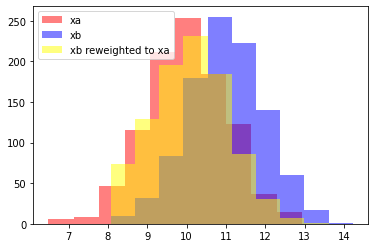

In [6]:
def evaluate():
    x, y = gen_data(1000)
    len_x = len(x)
    x = np.array(x).reshape(len_x, 1)
    y = np.array(y).reshape(len_x, 1)
    xa = x[y==0]
    xb = x[y==1]
    c0, _, _ = plt.hist(xa, alpha = 0.5, label = 'xa', color = 'red')
    c1, _, _ = plt.hist(xb, alpha = 0.5, label = 'xb', color = 'blue')
    with torch.no_grad():
        p = model(torch.Tensor(x))[:,0]
    p = np.array(p)
    y = y.reshape(1, len(y))[0]
    _pp = p[y==1]
    c2, _, _ = plt.hist(xb, alpha = 0.5, weights = (1-_pp)/_pp, label = 'xb reweighted to xa', color = 'yellow') 
    plt.legend()
    plt.show()

evaluate()